In [1]:
using Revise
using BiMDPs

[ Info: Precompiling BiMDPs [8af17bd5-7ea0-4ae2-8fd5-dbf3cdd18bce]


In [2]:
dir = "case010"

"case010"

In [3]:
rgw = case_dictionary[dir]

BiMDPs.RoverWorld.RoverWorldMDP
  grid_size: Tuple{Int64, Int64}
  max_time: Int64 20
  null_xy: Tuple{Int64, Int64}
  p_transition: Float64 1.0
  γ: Float64 0.95
  tgts: Dict{Int64, Tuple{Tuple{Int64, Int64}, Tuple{Int64, Int64}, Float64}}
  obstacles_grid: Array{Float64}((10, 10, 20)) [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; … ;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; -5.0 -5.0 … 0.0 0.0; -5.0 -5.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; -5.0 -5.0 … -5.0 0.0; … ; -5.0 -5.0 … -5.0 0.0; -5.0 -5.0 … -5.0 0.0;;; -5.0 -5.0 … -5.0 -5.0; -5.0 -5.0 … -5.0 -5.0; … ; -5.0 -5.0 … -5.0 -5.0; -5.0 -5.0 … -5.0 0.0]
  exit_xys: Array{Tuple{Int64, Int64}}((1,))
  include_measurement: Bool false
  measure_reward: Float64 0.0


## Plot rewards grid

In [4]:
BiMDPs.create_reward_field_evolution_gif(rgw; dir=dir)

"case010/reward_evolution.gif"

In [5]:
BiMDPs.create_reward_field_evolution_imgs(rgw; dir=dir)

Creating figure for t = 1 to 10
Creating figure for t = 11
Creating figure for t = 12
Creating figure for t = 13
Creating figure for t = 14
Creating figure for t = 15
Creating figure for t = 16
Creating figure for t = 17
Creating figure for t = 18
Creating figure for t = 19
Creating figure for t = 20


## Do one instance of a solve with Fine-grained MDP

In [6]:
using Random
rng = Random.seed!(11)
if rgw isa RoverWorld.RoverWorldMDP
    s0 = RoverWorld.rand_starting_state(rng, rgw)
elseif rgw isa MRoverWorld.MRoverWorldMDP
    s0 = MRoverWorld.rand_starting_state(rng, rgw)
end
comp_time, r, sar_history = solve_using_finegrained_mdp(rgw, max_iters=100, init_state = s0);

# for (s, a, r) in sar_history
#     println("s: $s")
#     println("a: $a")
#     println("r: $r")
# end

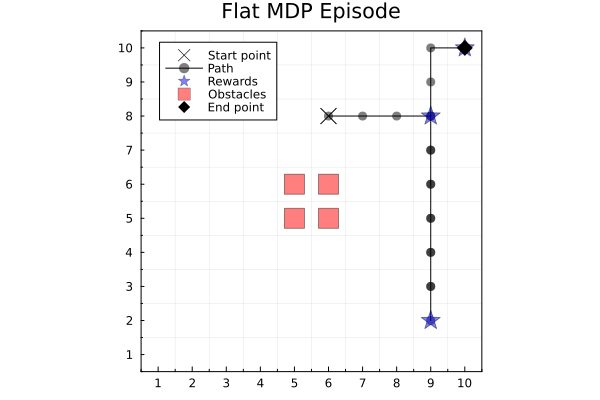

In [7]:
BiMDPs.plot_finegrained_simulated_episode(rgw, sar_history, dir=dir)

## Do one instance of a solve with Bi-Level MDP

In [8]:
using Random
rng = Random.seed!(11)
if rgw isa RoverWorld.RoverWorldMDP
    s0 = RoverWorld.rand_starting_state(rng, rgw)
elseif rgw isa MRoverWorld.MRoverWorldMDP
    s0 = MRoverWorld.rand_starting_state(rng, rgw)
end
comp_time, r, sar_history = solve_using_bilevel_mdp(rgw, max_iters=200, init_state = s0);

# for (s, a, r) in sar_history
#     println("s: $s")
#     println("a: $a")
#     println("r: $r")
# end

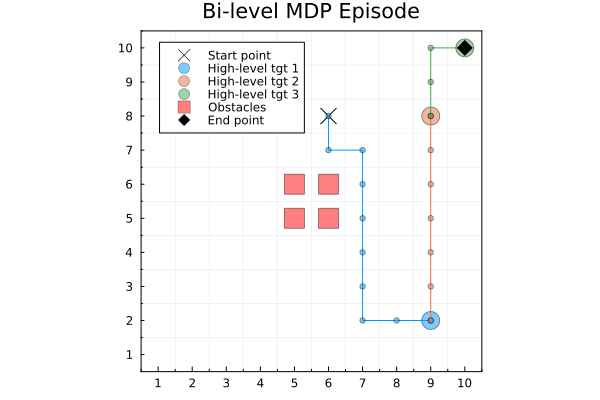

In [9]:
BiMDPs.plot_bilevel_simulated_episode(rgw, sar_history, dir=dir)

## Compare optimality vs computation time


In [21]:
# results = optimality_vs_compute(rgw, [("bl_vi", [5, 10], 100), ("vi", [10,50], 100), ("qlearning", [50,500], 500), ("sarsa", [50,500], 500)], dir=dir)

Reward of bl_vi after 100 simulations: μ = 16.217548814482765, σ = 33.06679359418551
Reward of bl_vi after 100 simulations: μ = 59.035549322546906, σ = 22.73629075410944
Reward of vi after 100 simulations: μ = 63.097877889993555, σ = 20.463565919317833
Reward of vi after 100 simulations: μ = 66.13114522588825, σ = 18.10070238359541
Reward of qlearning after 500 simulations: μ = -2.6565666635912932, σ = 23.926024233320334
Reward of qlearning after 500 simulations: μ = 13.978031640912834, σ = 30.867926651556278
Reward of sarsa after 500 simulations: μ = -1.286791804398717, σ = 20.651321280296056
Reward of sarsa after 500 simulations: μ = 1.0524547966533135, σ = 27.65604110856051


Dict{String, Tuple{Vector{Float64}, Vector{Float64}, Vector{Float64}}} with 4 entries:
  "vi"        => ([0.821182, 1.69412], [63.0979, 66.1311], [20.4636, 18.1007])
  "sarsa"     => ([0.0029923, 0.0422088], [-1.28679, 1.05245], [20.6513, 27.656…
  "bl_vi"     => ([0.33222, 0.404428], [16.2175, 59.0355], [33.0668, 22.7363])
  "qlearning" => ([0.0061017, 0.0366047], [-2.65657, 13.978], [23.926, 30.8679])

In [32]:
# results = optimality_vs_compute(rgw, [("bl_vi", [1, 10, 50, 100, 150, 300, 500, 1000], 100), ("vi", [1, 5, 8, 10, 15, 20, 50, 100, 150], 500), ("qlearning", [50,500,5000,50000], 500), ("sarsa", [50,500,5000,50000], 500)], dir=dir)

Reward of bl_vi after 100 simulations: μ = -6.810923869414412, σ = 6.146872466455737
Reward of bl_vi after 100 simulations: μ = 60.67111372181885, σ = 18.7832507284561
Reward of bl_vi after 100 simulations: μ = 63.78507598218467, σ = 14.009406852513978
Reward of bl_vi after 100 simulations: μ = 62.99797964976756, σ = 13.352159121467459
Reward of bl_vi after 100 simulations: μ = 64.21564292230954, σ = 12.191752951431027
Reward of bl_vi after 100 simulations: μ = 62.73485470526495, σ = 15.462403060822485
Reward of bl_vi after 100 simulations: μ = 66.0298167232699, σ = 9.677401248140457
Reward of bl_vi after 100 simulations: μ = 63.192688973091805, σ = 13.205217781116461
Reward of vi after 500 simulations: μ = -0.9559527128089228, σ = 20.179593349696137
Reward of vi after 500 simulations: μ = 32.820275954278905, σ = 33.251215914140886
Reward of vi after 500 simulations: μ = 55.66655310899054, σ = 28.327798378458425
Reward of vi after 500 simulations: μ = 61.44101086000895, σ = 20.98252496

Dict{String, Tuple{Vector{Float64}, Vector{Float64}, Vector{Float64}}} with 4 entries:
  "vi"        => ([0.1065, 0.465877, 0.765194, 0.991745, 1.36697, 1.76318, 1.78…
  "sarsa"     => ([0.0041947, 0.0346545, 0.387457, 3.90694], [-2.61924, 4.20193…
  "bl_vi"     => ([0.0671221, 0.355176, 0.521208, 0.486301, 0.42364, 0.521281, …
  "qlearning" => ([0.0039157, 0.0440473, 0.350142, 4.45019], [-0.504812, 7.4678…

In [33]:
using JLD2
fname = dir*"/"*"data-2023-10-03_21_26.jld2"
load(fname)["data"]

Dict{String, Tuple{Vector{Float64}, Vector{Float64}, Vector{Float64}}} with 4 entries:
  "vi"        => ([0.1065, 0.465877, 0.765194, 0.991745, 1.36697, 1.76318, 1.78…
  "sarsa"     => ([0.0041947, 0.0346545, 0.387457, 3.90694], [-2.61924, 4.20193…
  "bl_vi"     => ([0.0671221, 0.355176, 0.521208, 0.486301, 0.42364, 0.521281, …
  "qlearning" => ([0.0039157, 0.0440473, 0.350142, 4.45019], [-0.504812, 7.4678…

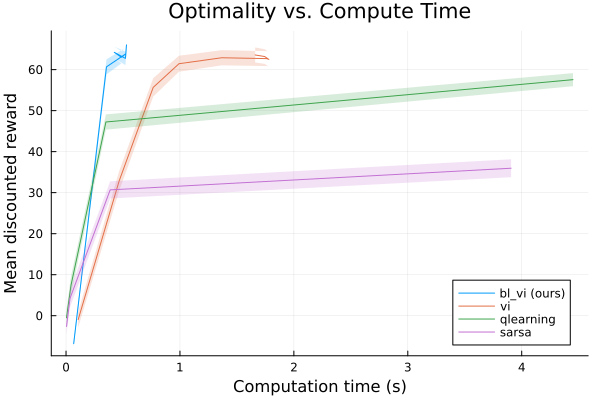

In [34]:
BiMDPs.plot_optimality_vs_compute(results, dir = dir)

## Test HL MDP

In [11]:
using POMDPs
using DiscreteValueIteration
hl_mdp = BiMDPs.HighLevelMDP(rgw)
hl_solver = ValueIterationSolver(max_iterations=100)
hl_policy = solve(hl_solver, hl_mdp);

## View stepthrough of one HL policy

In [12]:
s0 = HLRoverWorld.HLState(6,7,1,fill(false, length(rgw.tgts)))
steps = HLRoverWorld.collect_stepthrough(hl_mdp, hl_policy, init_state = s0)

4-element Vector{Any}:
 (s = BiMDPs.HLRoverWorld.HLState(6, 7, 1, Bool[0, 0, 0]), a = BiMDPs.HLRoverWorld.HLAction(1), r = 0)
 (s = BiMDPs.HLRoverWorld.HLState(9, 2, 9, Bool[0, 0, 0]), a = BiMDPs.HLRoverWorld.HLAction(2), r = 50.0)
 (s = BiMDPs.HLRoverWorld.HLState(9, 8, 15, Bool[1, 0, 0]), a = BiMDPs.HLRoverWorld.HLAction(3), r = 50.0)
 (s = BiMDPs.HLRoverWorld.HLState(10, 10, 18, Bool[1, 1, 0]), a = BiMDPs.HLRoverWorld.HLAction(1), r = 5.0)

In [13]:
rsum = sum(st.r for st in steps)
println("Undiscounted reward was $rsum.")

Undiscounted reward was 105.0.


## Another example

In [14]:
s0 = HLRoverWorld.HLState(1,9,1,fill(false, length(rgw.tgts)))
steps = HLRoverWorld.collect_stepthrough(hl_mdp, hl_policy, init_state = s0)

3-element Vector{Any}:
 (s = BiMDPs.HLRoverWorld.HLState(1, 9, 1, Bool[0, 0, 0]), a = BiMDPs.HLRoverWorld.HLAction(2), r = 0)
 (s = BiMDPs.HLRoverWorld.HLState(9, 8, 10, Bool[0, 0, 0]), a = BiMDPs.HLRoverWorld.HLAction(3), r = 50.0)
 (s = BiMDPs.HLRoverWorld.HLState(10, 10, 13, Bool[0, 1, 0]), a = BiMDPs.HLRoverWorld.HLAction(1), r = 5.0)

In [15]:
rsum = sum(st.r for st in steps)
println("Undiscounted reward was $rsum.")

Undiscounted reward was 55.0.


## From a non-starting state

In [16]:
s0 = HLRoverWorld.HLState(9,8,10,Bool[0,0,0])
steps = HLRoverWorld.collect_stepthrough(hl_mdp, hl_policy, init_state = s0)

2-element Vector{Any}:
 (s = BiMDPs.HLRoverWorld.HLState(9, 8, 10, Bool[0, 0, 0]), a = BiMDPs.HLRoverWorld.HLAction(3), r = 50.0)
 (s = BiMDPs.HLRoverWorld.HLState(10, 10, 13, Bool[0, 1, 0]), a = BiMDPs.HLRoverWorld.HLAction(1), r = 5.0)

In [17]:
s0 = HLRoverWorld.HLState(9,7,9,Bool[0,0,0])
steps = HLRoverWorld.collect_stepthrough(hl_mdp, hl_policy, init_state = s0)

3-element Vector{Any}:
 (s = BiMDPs.HLRoverWorld.HLState(9, 7, 9, Bool[0, 0, 0]), a = BiMDPs.HLRoverWorld.HLAction(2), r = 0)
 (s = BiMDPs.HLRoverWorld.HLState(9, 8, 10, Bool[0, 0, 0]), a = BiMDPs.HLRoverWorld.HLAction(3), r = 50.0)
 (s = BiMDPs.HLRoverWorld.HLState(10, 10, 13, Bool[0, 1, 0]), a = BiMDPs.HLRoverWorld.HLAction(1), r = 5.0)